In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl


# Resumen total desde los meses de marzo hasta septiembre


In [2]:
# global int
pd.options.display.float_format = '{:.0f}'.format

In [3]:
def getValues(month):
    d = pd.read_csv("data-" + month + ".csv", index_col="Name")
    d = d.apply(pd.to_numeric, errors='ignore').fillna(-1)
    d = d.drop(columns="Unnamed: 2")
    d["Total"] = d.drop("Partido", axis=1).apply(np.sum, axis=1)
    return d

In [4]:
marzo = getValues("3-2022")
abril = getValues("4-2022")
mayo = getValues("5-2022")
junio = getValues("6-2022")
julio = getValues("7-2022")
agosto = getValues("8-2022")

def returnDataWithoutPartido(xd):
    xd["Partido"] = pd.DataFrame(xd).mask(lambda col: col != "", "")["Partido"]
    return xd

# this dataframe contain all values acum for each period
df = pd.DataFrame(marzo)
df = df.add(returnDataWithoutPartido(abril), fill_value=0)
df = df.add(returnDataWithoutPartido(mayo), fill_value=0)
df = df.add(returnDataWithoutPartido(junio), fill_value=0)
df = df.add(returnDataWithoutPartido(julio), fill_value=0)
df = df.add(returnDataWithoutPartido(agosto), fill_value=0)
promedio = df.drop(columns="Partido")
promedio = promedio/6
promedio["Partido"] = df["Partido"]
promedio.sum()["Total"]
#df.sum()["Total"]

717758190.8333334

In [5]:
#utils
gradeColors = {
    'COMUNES': 7,
    'DC': 7,
    'EVOP': 5,
    'FRVS': 5,
    'IND': 5,
    'LIBERAL': 4,
    'PC': 10,
    'PCC': 6,
    'PCS': 7,
    'PDG': 4,
    'PEV': 5,
    'PH': 6,
    'PPD': 6,
    'PR': 6,
    'PREP': 2,
    'PRI': 5,
    'PS': 7,
    'RD': 6,
    'RN': 5,
    'UDI': 1,
}


def colorFader(c1, c2, mix=0):  #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)


c1 = '#03FFBA'  #blue
c2 = '#FF0000'  #red


def getColorToPartido(v):
    return colorFader(c1, c2, v / 10)


colors = {}
handles = []
for i in gradeColors:
    c = getColorToPartido(gradeColors[i])
    colors[i] = c
    handles.append(mpatches.Patch(color=c, label=i))

colors

{'COMUNES': '#b34d38',
 'DC': '#b34d38',
 'EVOP': '#81805d',
 'FRVS': '#81805d',
 'IND': '#81805d',
 'LIBERAL': '#689970',
 'PC': '#ff0000',
 'PCC': '#9a664a',
 'PCS': '#b34d38',
 'PDG': '#689970',
 'PEV': '#81805d',
 'PH': '#9a664a',
 'PPD': '#9a664a',
 'PR': '#9a664a',
 'PREP': '#35cc95',
 'PRI': '#81805d',
 'PS': '#b34d38',
 'RD': '#9a664a',
 'RN': '#81805d',
 'UDI': '#1ce6a7'}

# Los más gastadores

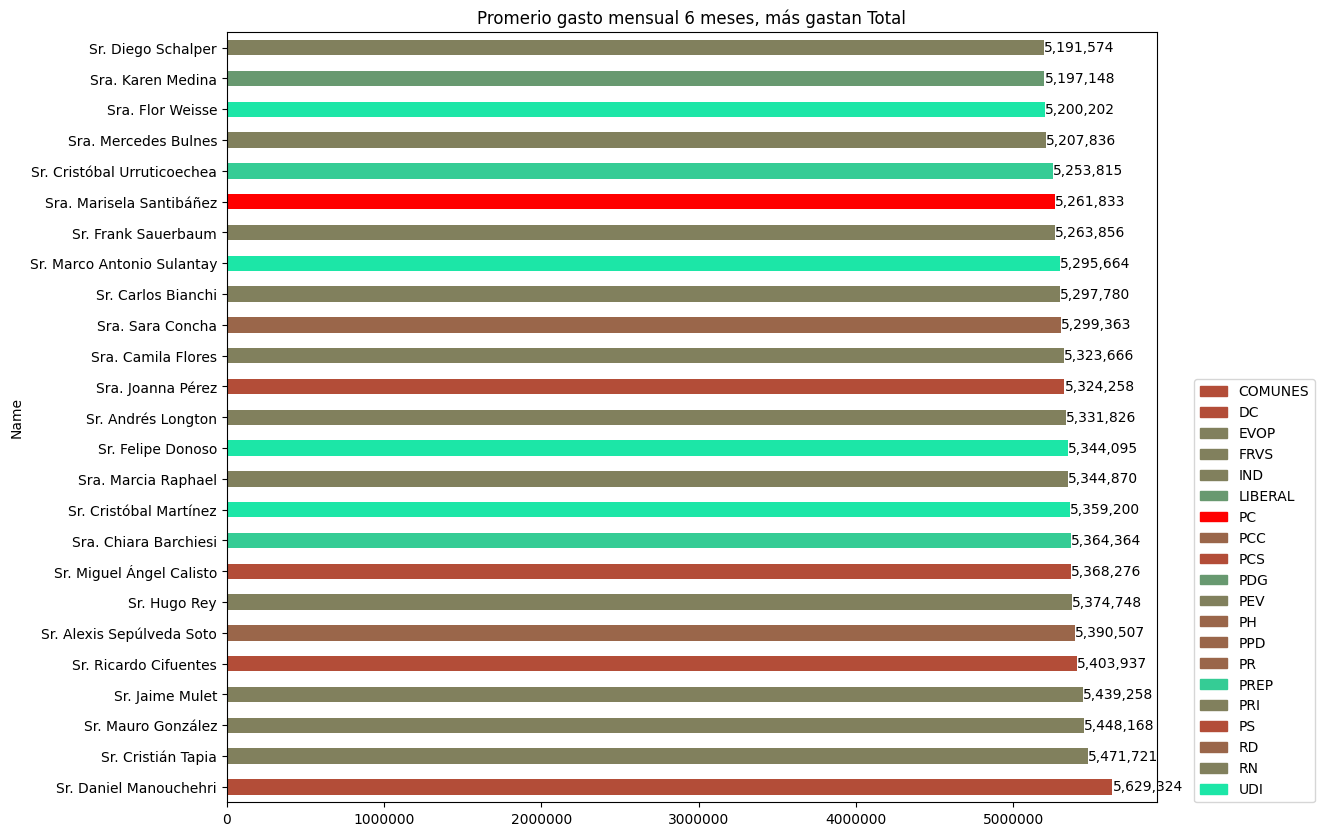

In [6]:
category = "Total"

analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()

d = analyze.plot(x="Name", y=category, title="Promerio gasto mensual 6 meses, más gastan " + category, color=color, kind="barh",
                 figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x")
plt.show()


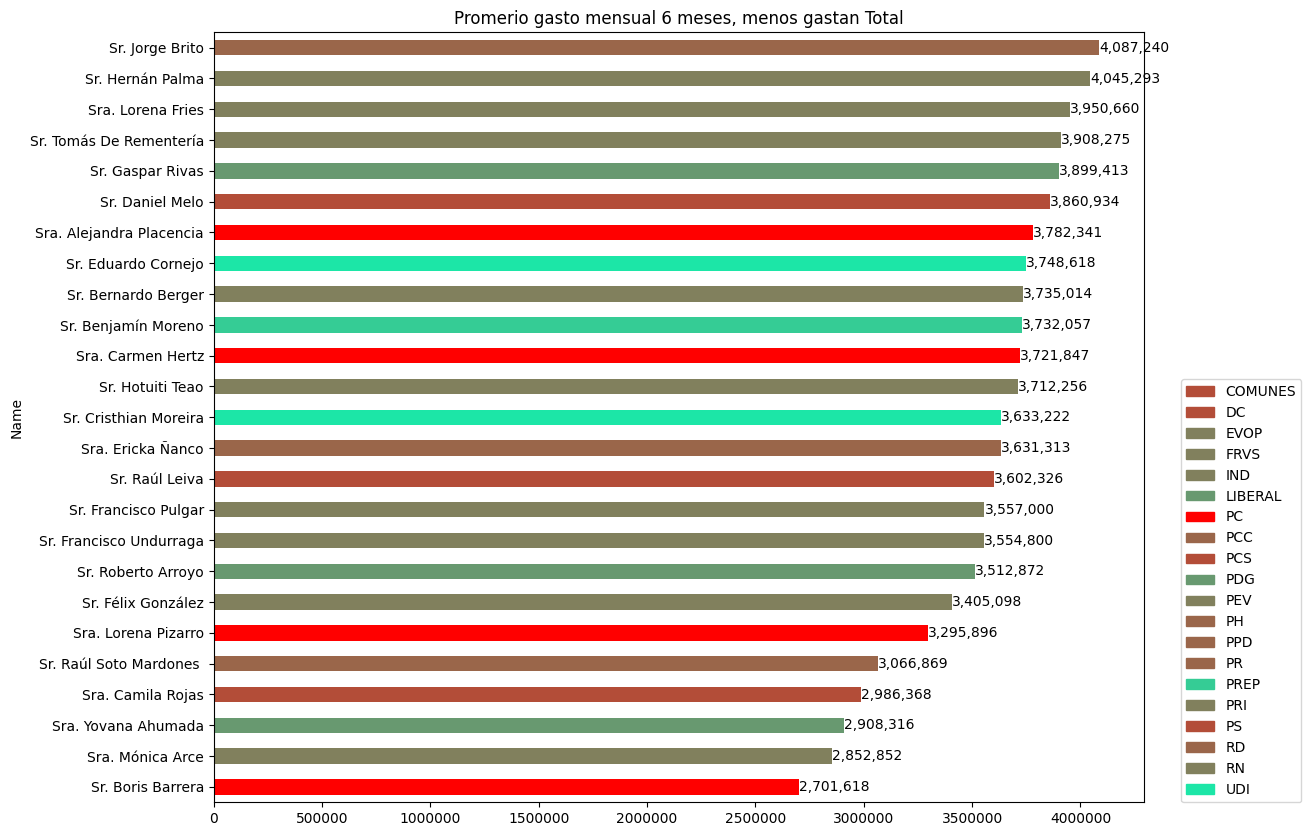

In [7]:
category = "Total"

analyze = promedio.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()

d = analyze.plot(x="Name", y=category, title="Promerio gasto mensual 6 meses, menos gastan " + category, color=color, kind="barh",
                 figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x")
plt.show()

# Gasto por partido

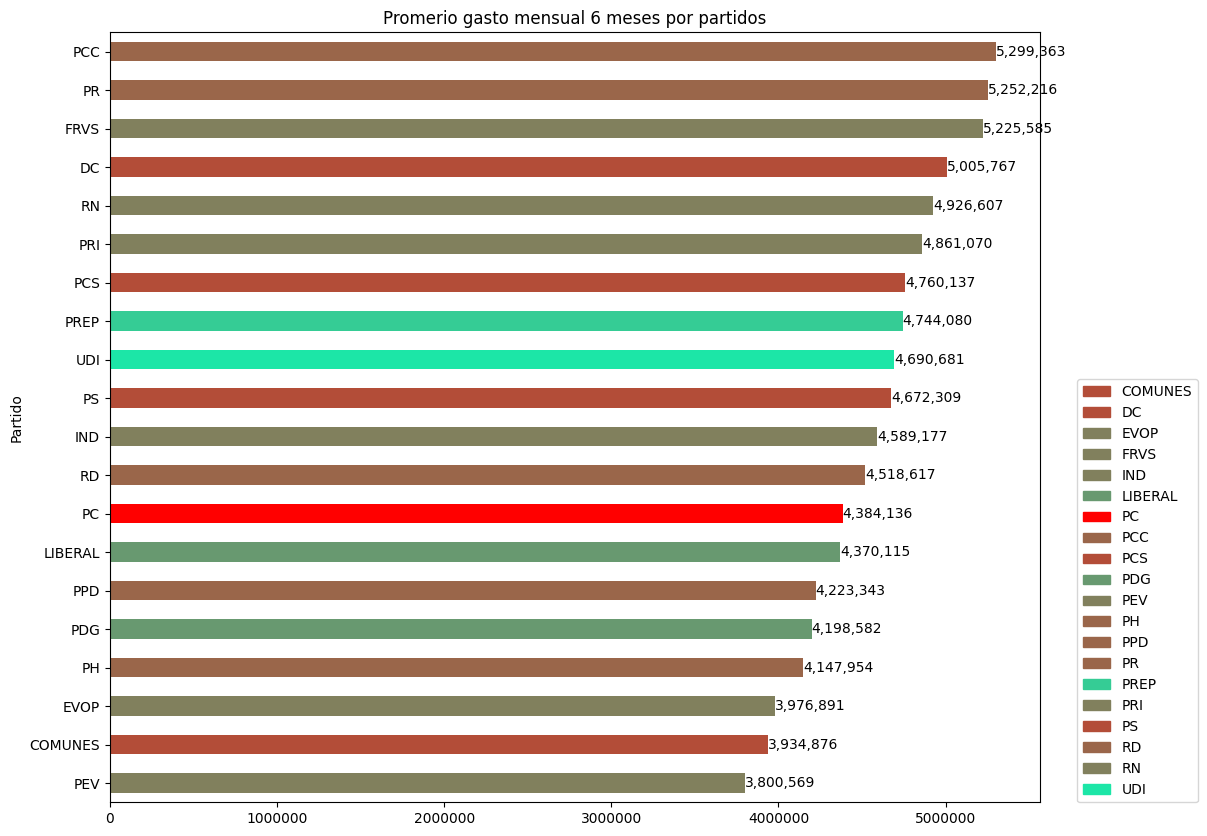

In [8]:
v = promedio.groupby("Partido").mean().sort_values("Total", ascending=True)

color = v.reset_index()["Partido"].map(colors).tolist()
d = v.plot(y="Total", kind="barh", color=color, figsize=(12, 10), title="Promerio gasto mensual 6 meses por partidos")

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain',axis="x" )
plt.show()



# Promedio por utilidad

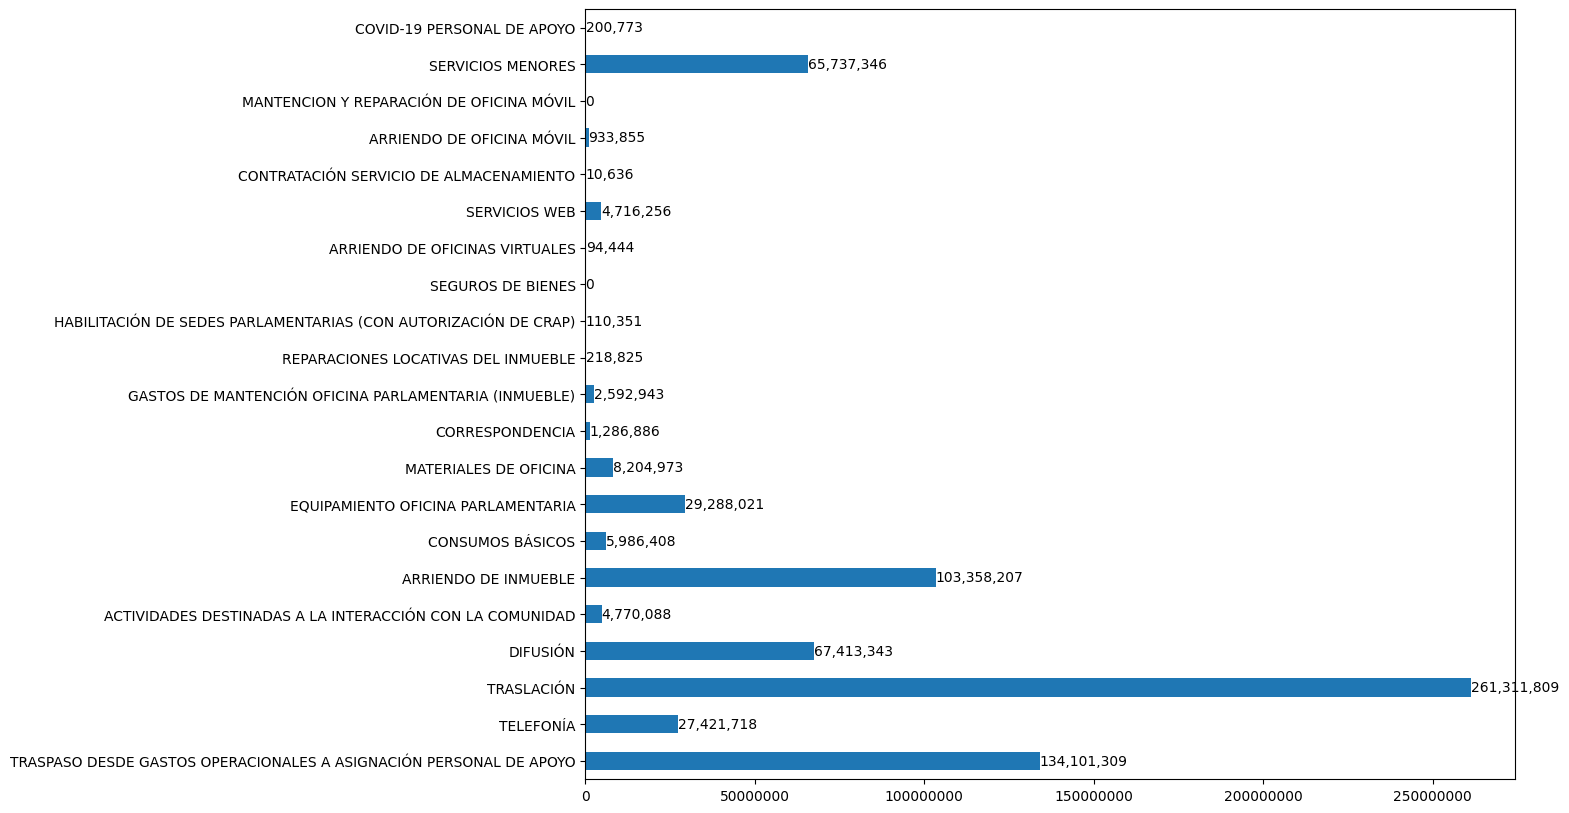

In [9]:

from matplotlib import ticker

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)

pl = promedio.sum().drop(labels="Partido", axis=0).drop(labels="Total", axis=0).plot(kind="barh",
                                                                                              figsize=(12, 10))
# to number with format h
con = pl.containers[0]
pl.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
pl.ticklabel_format(style='plain', axis="x")
plt.show()


# Gasto total promedio mensual

In [10]:
import re

val = promedio.sum().drop(labels="Partido", axis=0)["Total"]
print(re.sub(r'(?<!^)(?=(\d{3})+$)', r'.', str(str.split(str(val),".")[0])))

717.758.190


# Premios a los más destacados

### Por Sacar pasaje a la luna

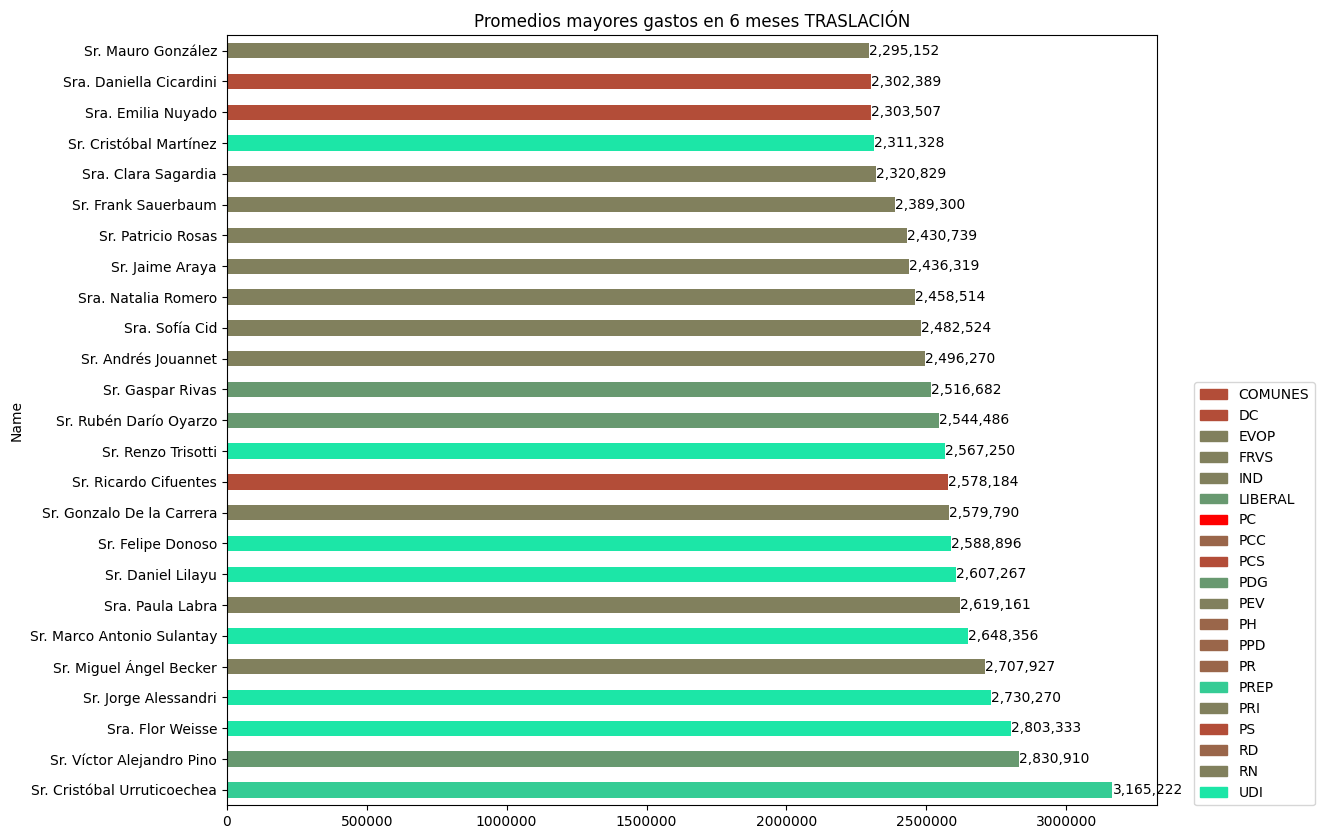

In [11]:
analyze = promedio.sort_values(by="TRASLACIÓN", ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="TRASLACIÓN", title="Promedios mayores gastos en 6 meses TRASLACIÓN", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


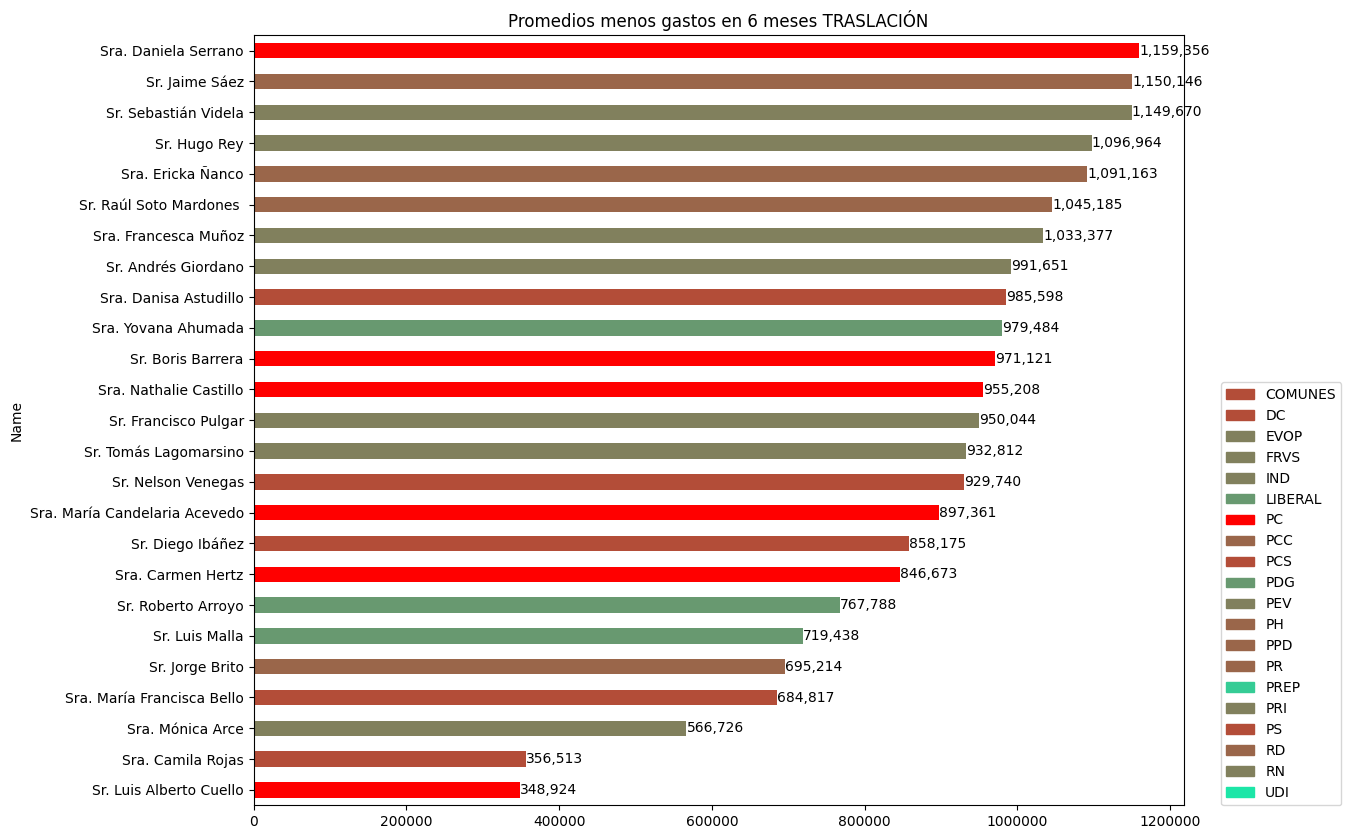

In [12]:
analyze = promedio.sort_values(by="TRASLACIÓN", ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y="TRASLACIÓN", title="Promedios menos gastos en 6 meses TRASLACIÓN", color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


#### Conclusión, parece que la internacional se aplica más a la derecha, o no tienen donde ir

### Por tener más apitutados dentro del estado

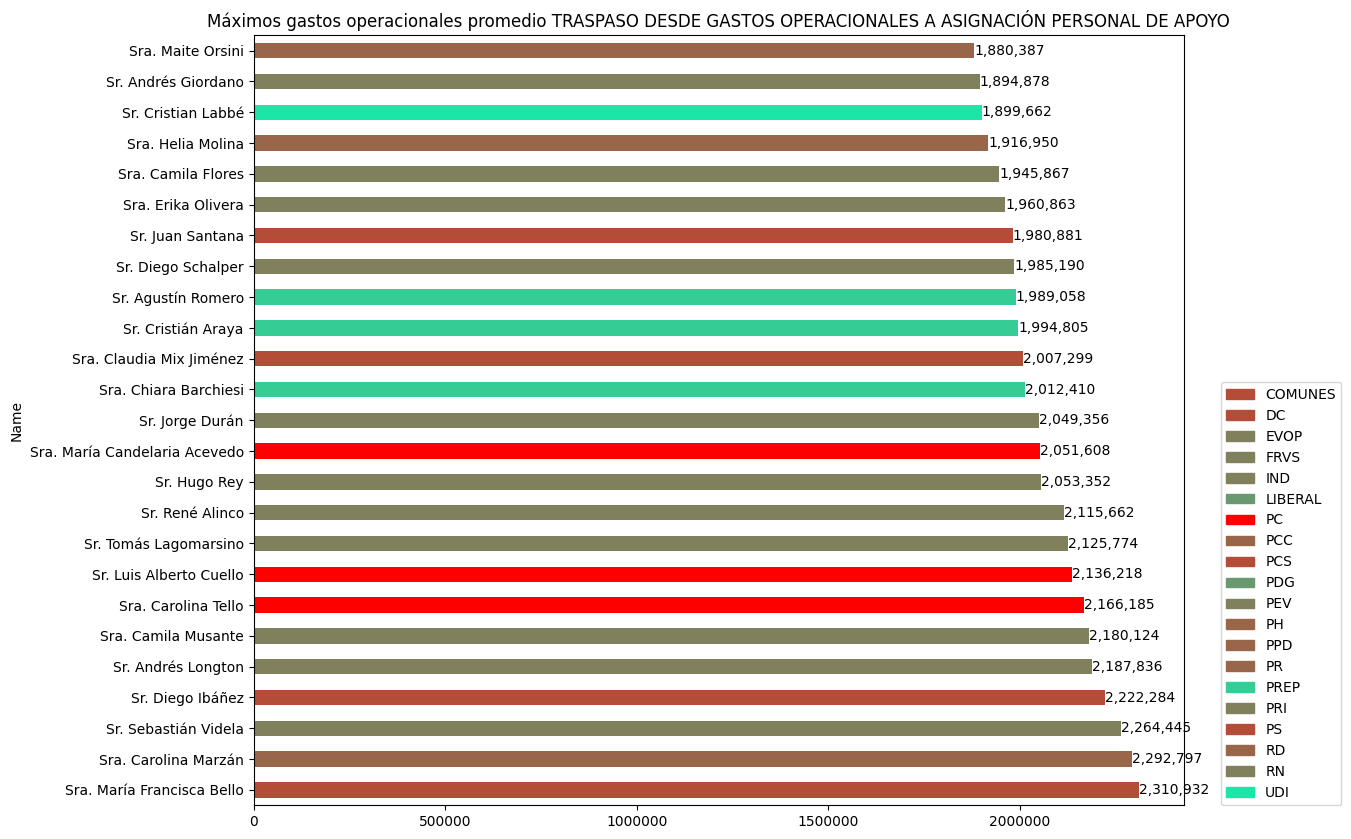

In [13]:
category = "TRASPASO DESDE GASTOS OPERACIONALES A ASIGNACIÓN PERSONAL DE APOYO"

analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos operacionales promedio "+category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


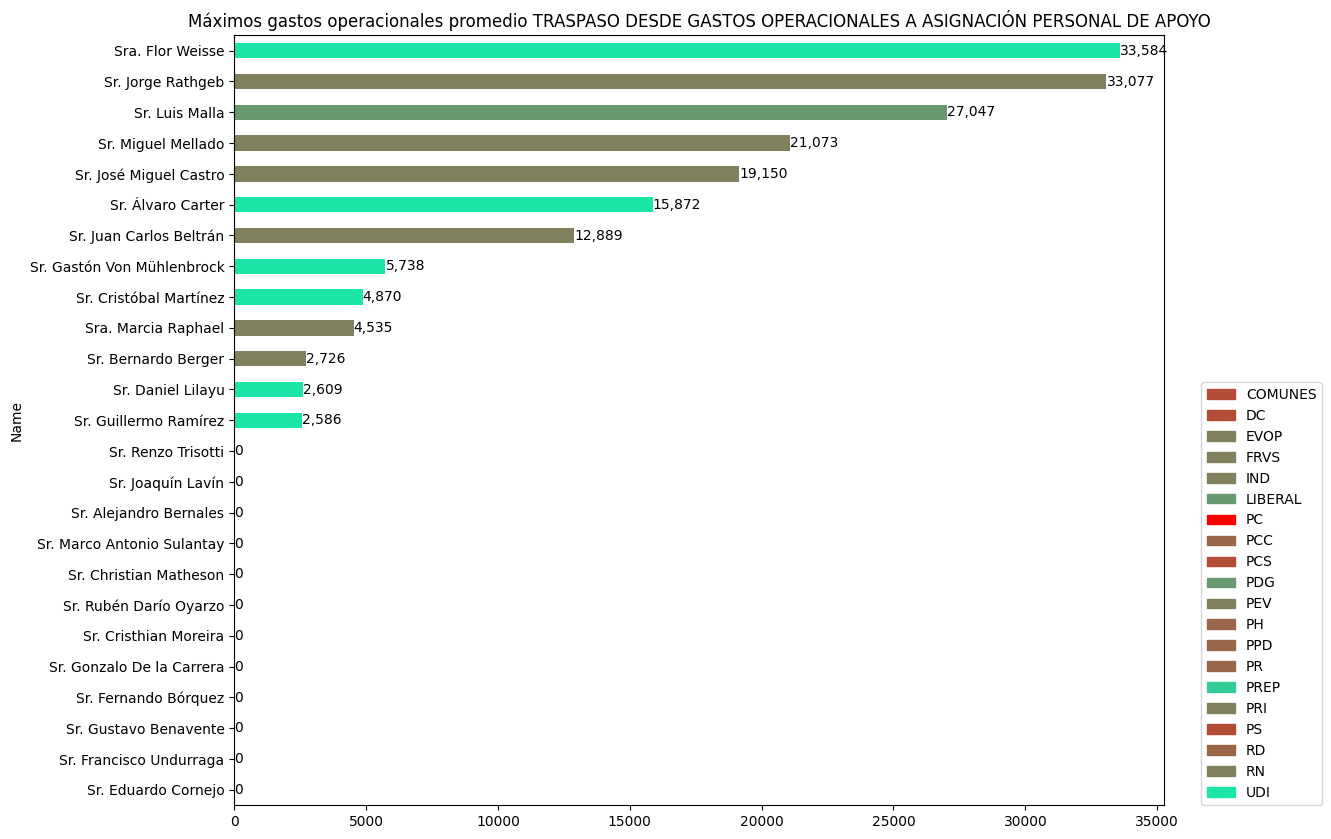

In [14]:
category = "TRASPASO DESDE GASTOS OPERACIONALES A ASIGNACIÓN PERSONAL DE APOYO"

analyze = promedio.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos operacionales promedio "+category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()

### Actrices y actores frustados


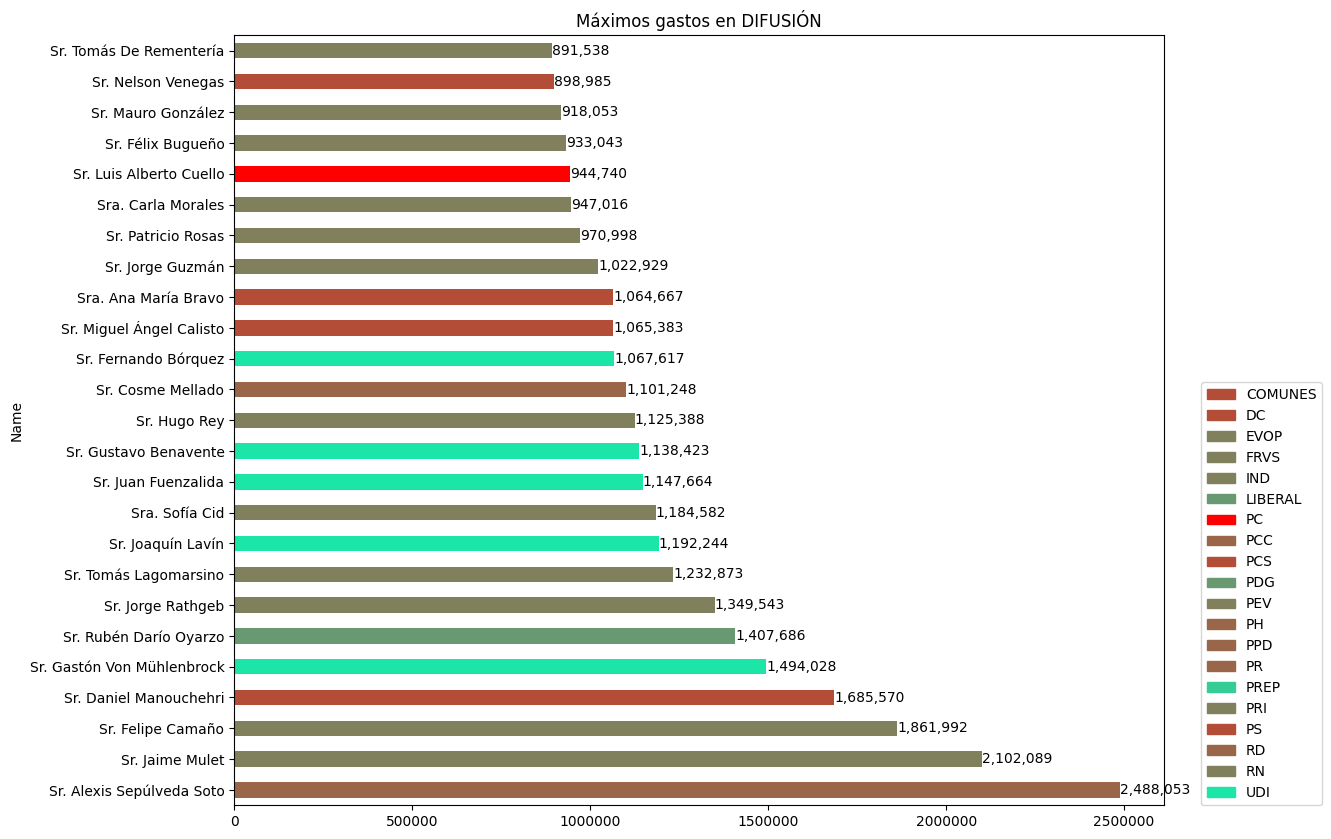

In [15]:
category = "DIFUSIÓN"
analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


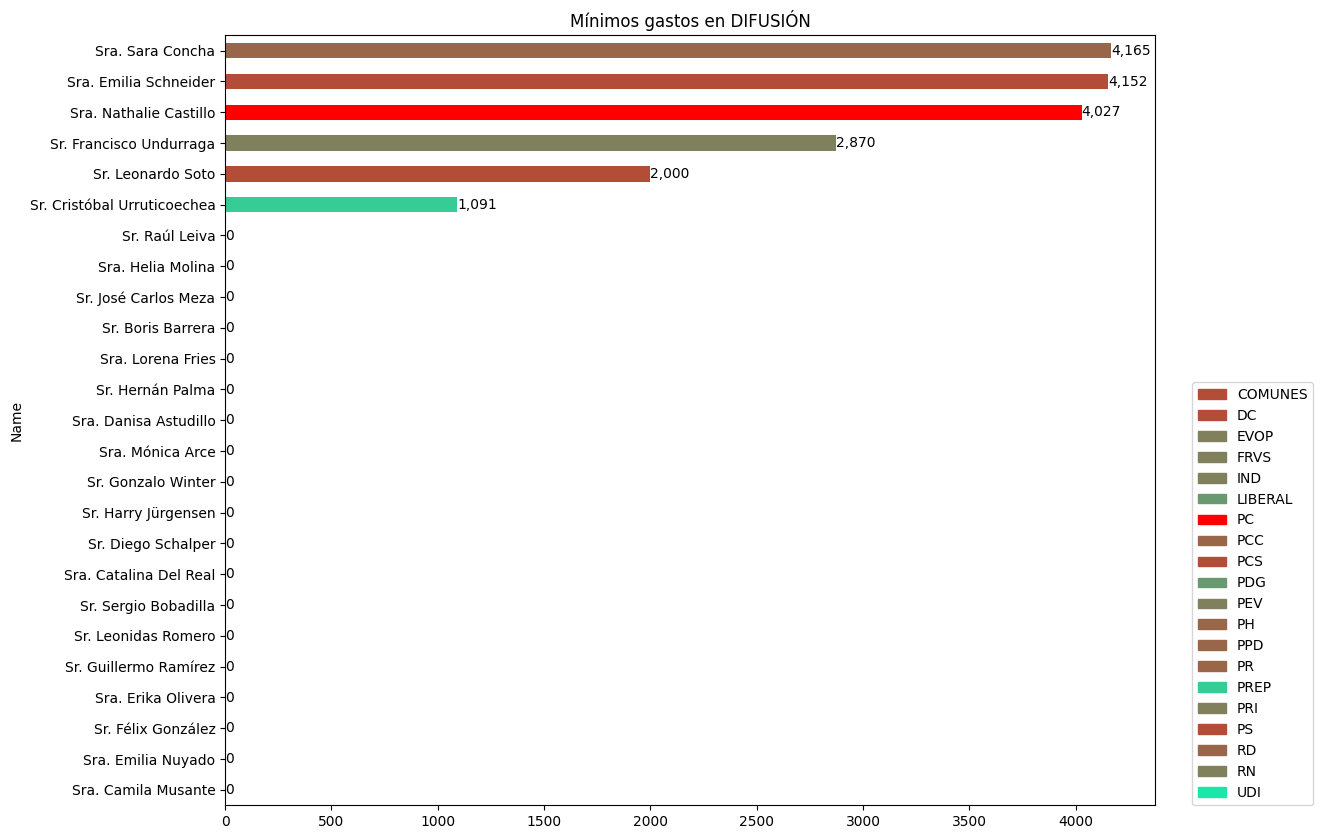

In [16]:
category = "DIFUSIÓN"
analyze = promedio.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Mínimos gastos en "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


### Con mi casa no

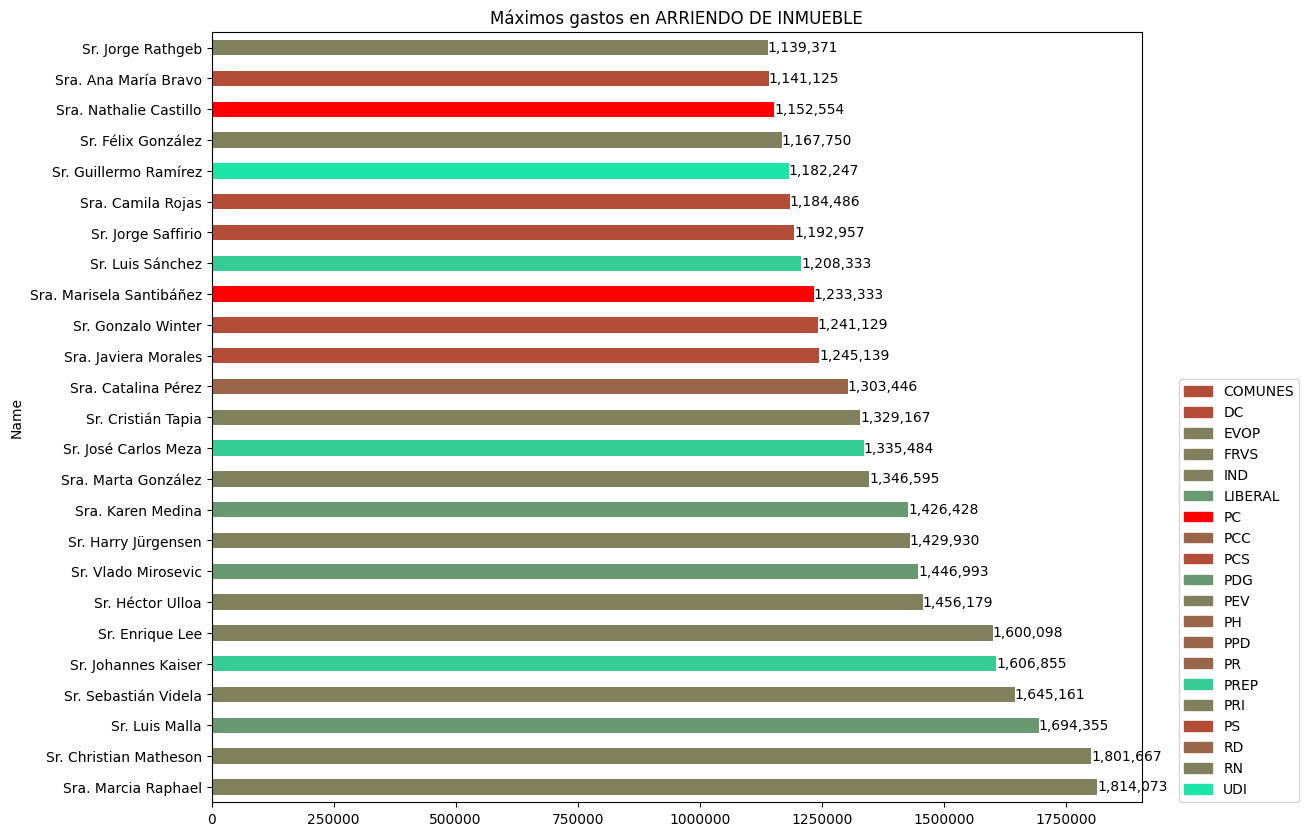

In [17]:
category = "ARRIENDO DE INMUEBLE"

analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


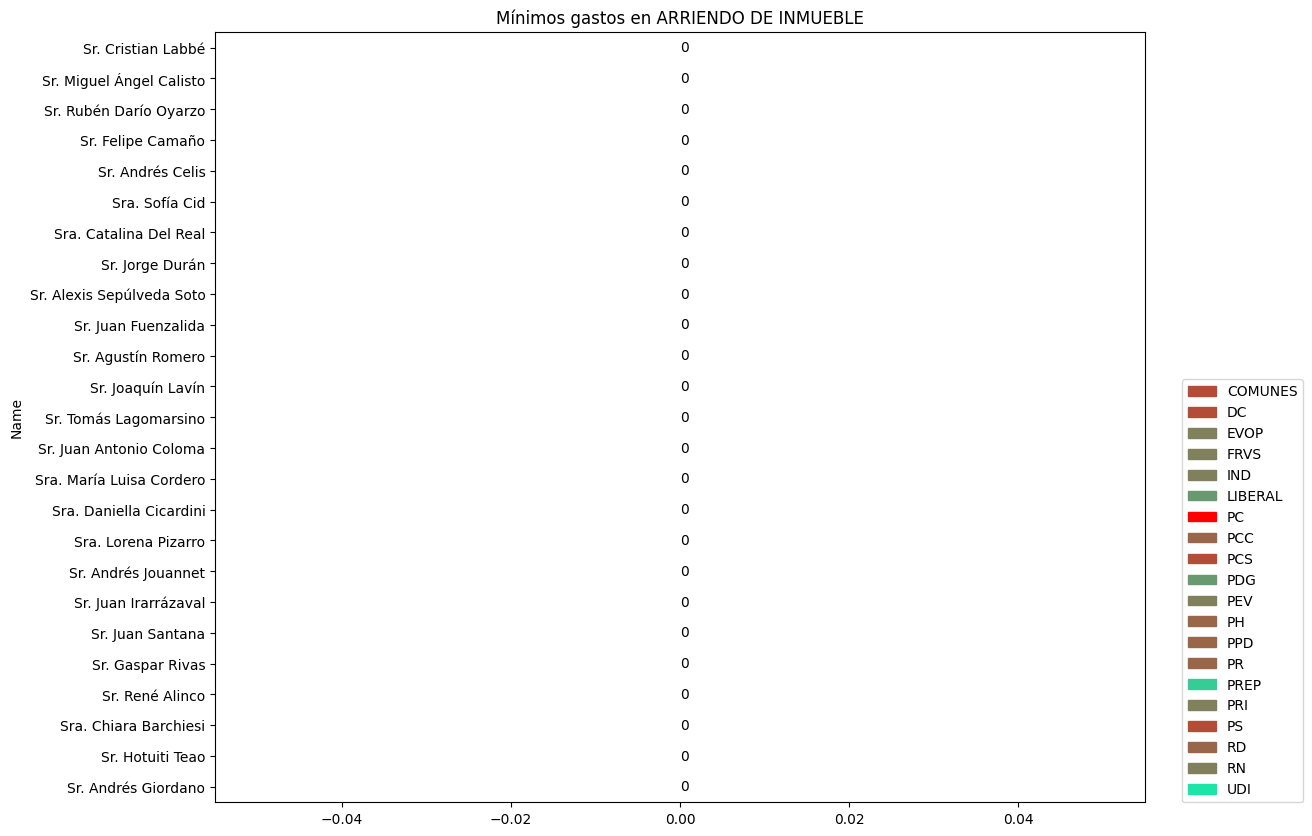

In [18]:
category = "ARRIENDO DE INMUEBLE"

analyze = promedio.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Mínimos gastos en "+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


### La familia lo es todo

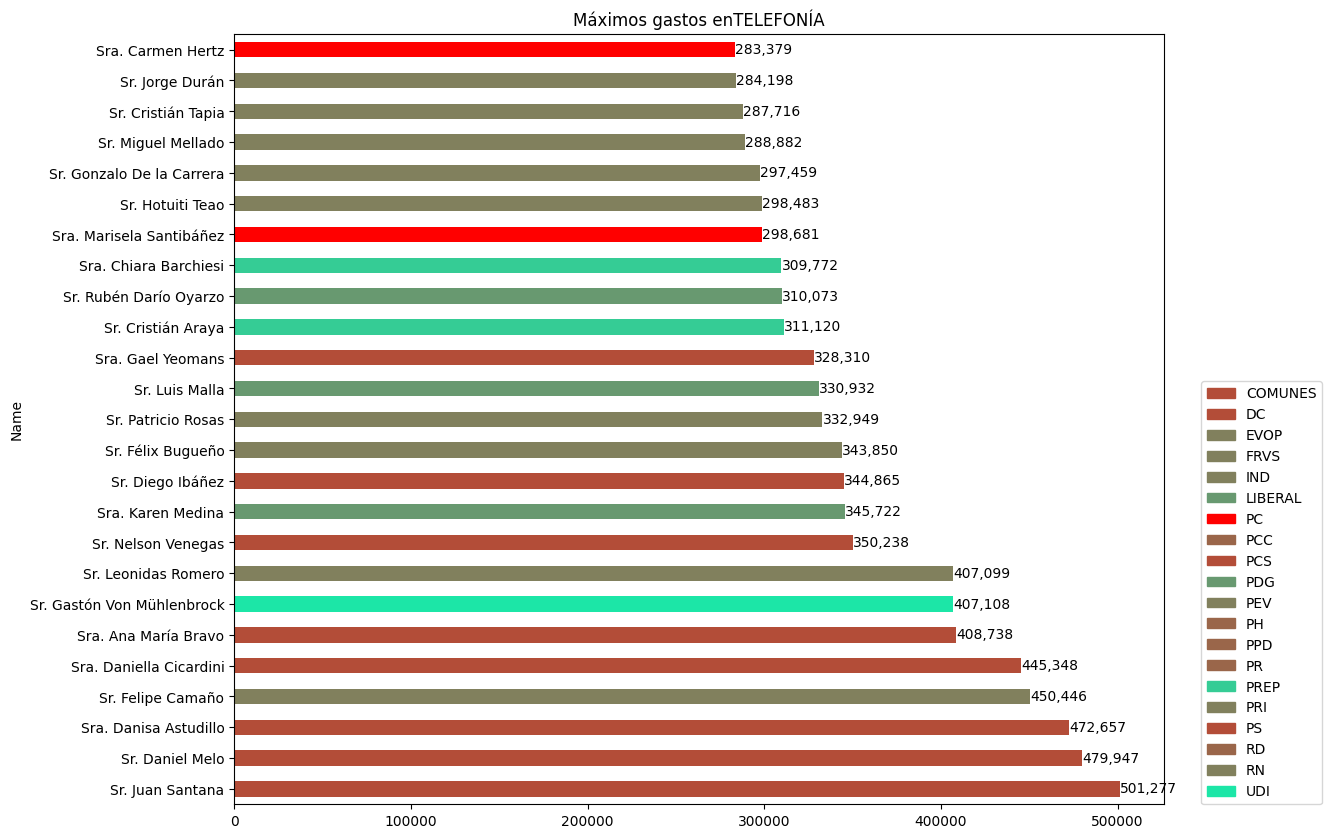

In [19]:
category = "TELEFONÍA"

analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Máximos gastos en"+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


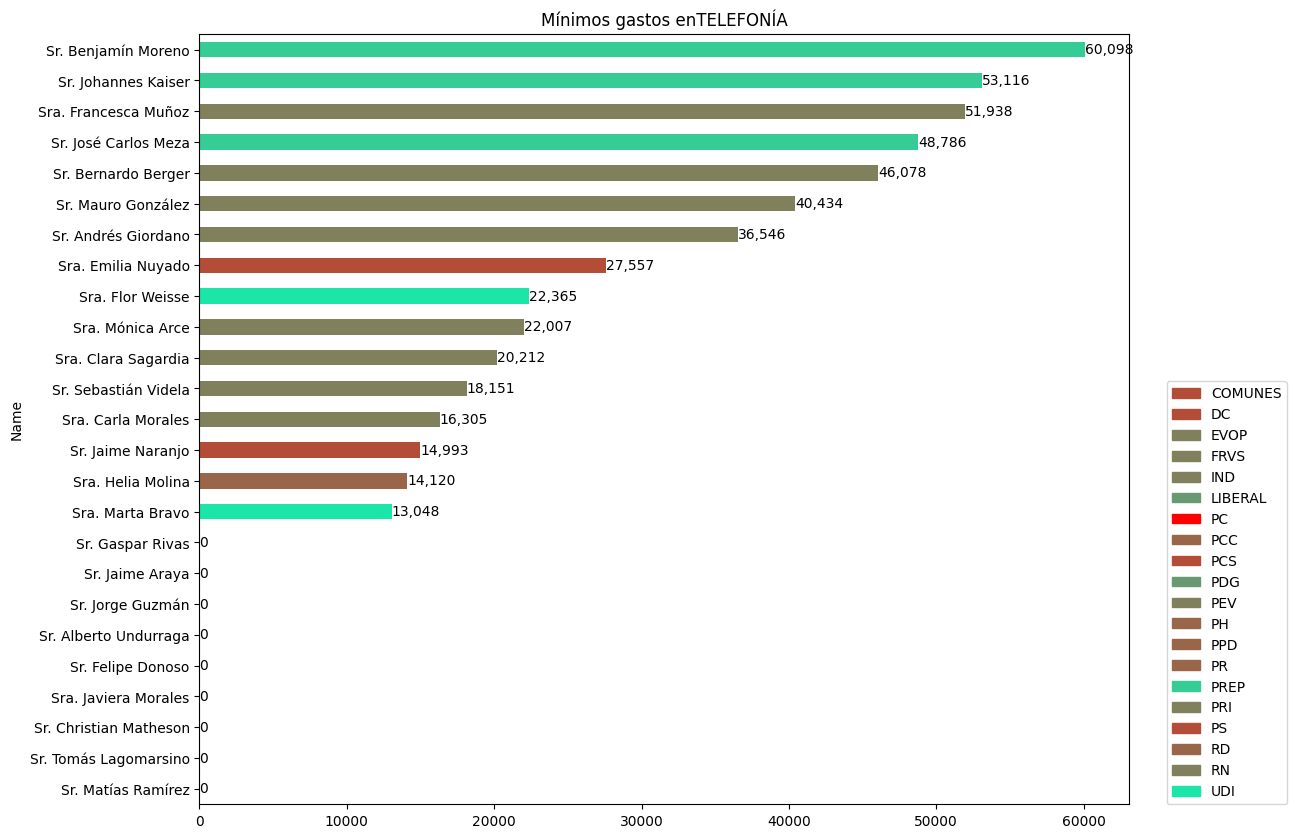

In [20]:
category = "TELEFONÍA"

analyze = promedio.sort_values(by=category, ascending=True).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Mínimos gastos en"+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()


## Futuros youtubers

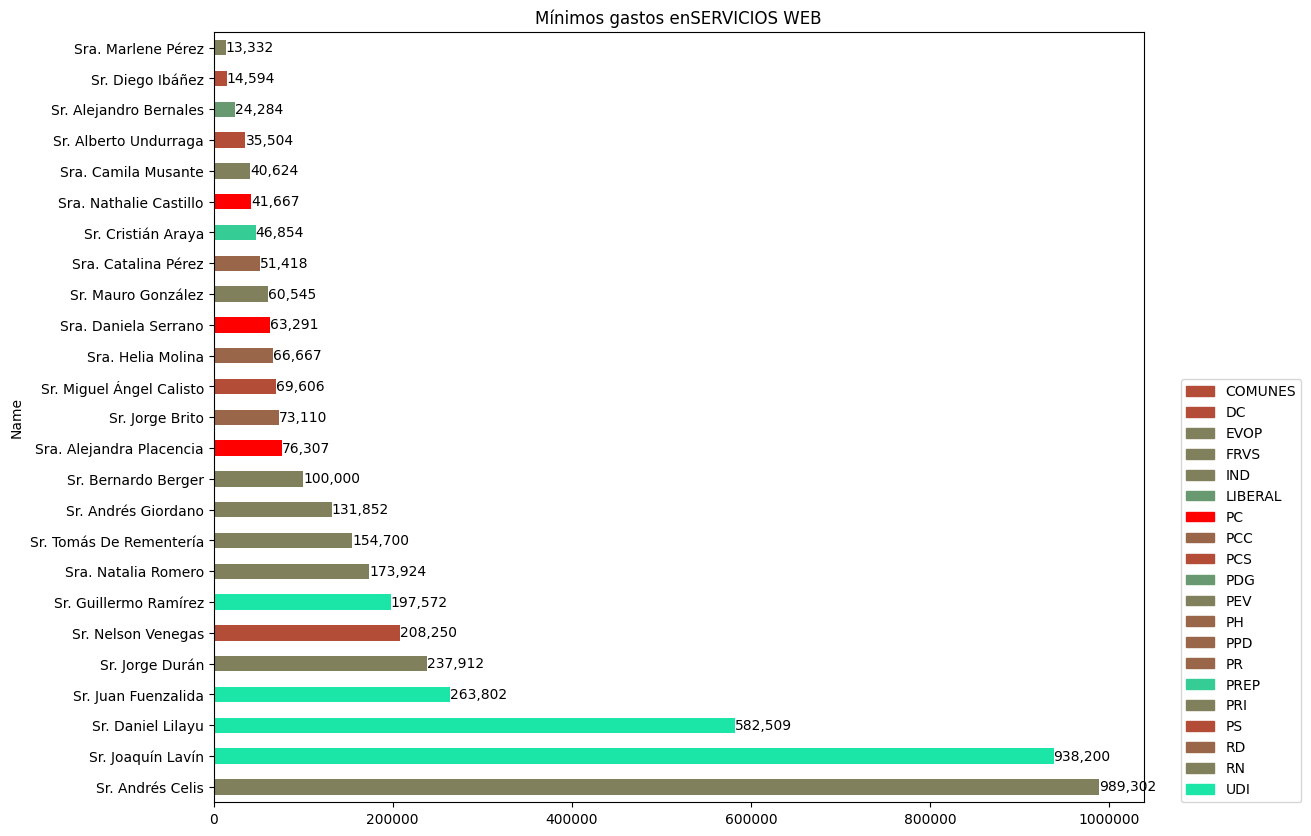

In [21]:
category = "SERVICIOS WEB"

analyze = promedio.sort_values(by=category, ascending=False).iloc[0:25]
analyze = analyze.reset_index()
color = analyze["Partido"].map(colors).tolist()
d = analyze.plot(x="Name", y=category, title="Mínimos gastos en"+ category, color=color, kind="barh",
             figsize=(12, 10))

plt.legend(handles=handles, loc=(1.04, 0))

# to number with format h
con = d.containers[0]
d.bar_label(con, fmt='%d', labels=[f'{x:,.0f}' for x in con.datavalues])
d.ticklabel_format(style='plain', axis="x" )
plt.show()
